In [2]:
import xnet
import json
import glob

import numpy as np
import matplotlib.pyplot as plt

from igraph import *
from collections import defaultdict
from matplotlib.ticker import MaxNLocator
from util import save,load
from util import get_attr_pacs,get_pac_list,get_pacs_paper_published

In [3]:
attr_pacs = get_attr_pacs()
pac_list = get_pac_list()

In [4]:
def get_in(paper,data):
    pacs = []
    p_neighbors = data.neighbors(paper,mode=IN)
    n_neighbors = len(p_neighbors)
    return n_neighbors

def get_out(paper,data):
    pacs = []
    p_neighbors = data.neighbors(paper,mode=OUT)
    n_neighbors = len(p_neighbors)
    return n_neighbors

In [13]:
def get_freq_of(data,get_freq,delta,filename):

	history = defaultdict(lambda:defaultdict(lambda:0))

	year_begin = 1986
	year_end = 2006

	for i,year in enumerate(range(year_begin,year_end+1)):
		print("current year %d" % year)
		subset = data.vs.select(year_ge=year,year_le=year+delta)
		subgraph = data.subgraph(subset)
		for paper in subgraph.vs:
			authors_idxs = paper['authors_idxs'].split(',')
			value = get_freq(paper,subgraph)
			for author in authors_idxs:
				history[author][year+delta] += value
		save(history,filename)

	return history

In [14]:
data = xnet.xnet2igraph('data/citation_network_ge1985_pacs.xnet')

filenames = sorted(glob.glob('data/pacs/2lvls/*_multilevel2.xnet'))
pac_nets = []
for filename in filenames:
	net = xnet.xnet2igraph(filename)
	pac_nets.append(net)

In [15]:
get_freq_of(data,get_in,4,'authors_in_freq.json')

current year 1986
current year 1987
current year 1988
current year 1989
current year 1990
current year 1991
current year 1992
current year 1993
current year 1994
current year 1995
current year 1996
current year 1997
current year 1998
current year 1999
current year 2000
current year 2001
current year 2002
current year 2003
current year 2004
current year 2005
current year 2006


defaultdict(<function __main__.get_freq_of.<locals>.<lambda>()>,
            {'2147481374': defaultdict(<function __main__.get_freq_of.<locals>.<lambda>.<locals>.<lambda>()>,
                         {1990: 0,
                          1991: 0,
                          1992: 0,
                          1993: 0,
                          1994: 0,
                          1995: 0,
                          1996: 0,
                          1997: 1,
                          1998: 2,
                          1999: 9,
                          2000: 21,
                          2001: 53,
                          2002: 119,
                          2003: 152,
                          2004: 216,
                          2005: 335,
                          2006: 266,
                          2007: 83,
                          2008: 78,
                          2009: 66,
                          2010: 34}),
             '2156212925': defaultdict(<function __main__.get_freq_of.<l

In [16]:
get_freq_of(data,get_out,4,'authors_out_freq.json')

current year 1986
current year 1987
current year 1988
current year 1989
current year 1990
current year 1991
current year 1992
current year 1993
current year 1994
current year 1995
current year 1996
current year 1997
current year 1998
current year 1999
current year 2000
current year 2001
current year 2002
current year 2003
current year 2004
current year 2005
current year 2006


defaultdict(<function __main__.get_freq_of.<locals>.<lambda>()>,
            {'2147481374': defaultdict(<function __main__.get_freq_of.<locals>.<lambda>.<locals>.<lambda>()>,
                         {1990: 0,
                          1991: 0,
                          1992: 0,
                          1993: 6,
                          1994: 4,
                          1995: 2,
                          1996: 1,
                          1997: 0,
                          1998: 6,
                          1999: 11,
                          2000: 13,
                          2001: 53,
                          2002: 98,
                          2003: 80,
                          2004: 74,
                          2005: 66,
                          2006: 43,
                          2007: 37,
                          2008: 41,
                          2009: 36,
                          2010: 13}),
             '2156212925': defaultdict(<function __main__.get_freq_of.<local

In [9]:
def get_min_freqs(data,min_values):
    freq = defaultdict(lambda:[])
    for author,a_hist in data.items():
        for year,value in a_hist.items():
            freq[year].append(value)
    
    years = []
    freqs_dict = {}
    for min_value in min_values:
        freqs_dict[min_value] = []
    
    for year,freqs in freq.items():
        years.append(year)
        freqs = np.asarray(freqs)
        total = len(freqs)
        
        for min_value in min_values:
            p = 100*sum(freqs >= min_value)/total
            freqs_dict[min_value].append(p)
    return years,freqs_dict

In [10]:
def plot_min_values(years,freqs_dict,title):
    plt.figure(figsize=(10,3))
    for min_value,freqs in freqs_dict.items():
        plt.plot(years,freqs,marker='o',ls='-',label=min_value)
    plt.legend()
    plt.xlabel('year')
    plt.xticks(rotation=45)
    plt.ylabel('%')
    plt.title(title)
    plt.ylim((0, 15))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('temp/%s.pdf' % title)
    plt.show()

In [17]:
authors_out = load('authors_out_freq.json')
authors_in = load('authors_in_freq.json')

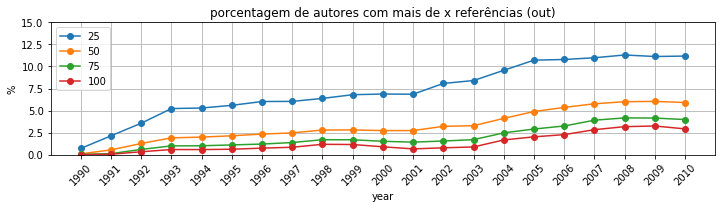

In [18]:
min_values = [25,50,75,100]
years,freqs_dict = get_min_freqs(authors_out,min_values)
plot_min_values(years,freqs_dict,'porcentagem de autores com mais de x referências (out)')

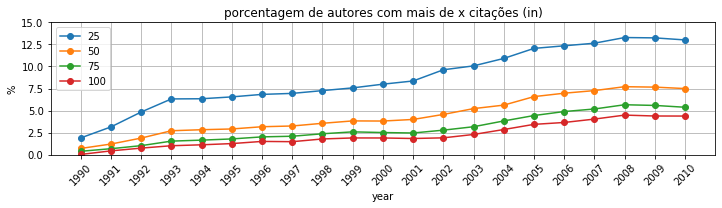

In [19]:
years,freqs_dict = get_min_freqs(authors_in,min_values)
plot_min_values(years,freqs_dict,'porcentagem de autores com mais de x citações (in)')

In [20]:
def get_total_of(data,get_out,filename):
    freqs = defaultdict(lambda:0)
    for paper in data.vs:
        authors_idxs = paper['authors_idxs'].split(',')
        value = get_out(paper,data)
        for author in authors_idxs:
            freqs[author] += value
    save(freqs,filename)
    return freqs

In [21]:
get_total_of(data,get_out,'num_of_refs.json')
get_total_of(data,get_in,'num_of_citations.json')

defaultdict(<function __main__.get_total_of.<locals>.<lambda>()>,
            {'1275668437': 5552,
             '246821553': 4344,
             '2114421234': 4405,
             '2138919347': 2306,
             '739720355': 3935,
             '1902042639': 636,
             '380877658': 754,
             '1370314892': 198,
             '2665776227': 176,
             '2050218935': 2839,
             '2487817044': 1149,
             '2675168138': 428,
             '2680511905': 428,
             '2710343950': 428,
             '2147481374': 1566,
             '2100120781': 2317,
             '2044280228': 1467,
             '2103728845': 8372,
             '1963693510': 1400,
             '1967297251': 545,
             '2115306259': 2662,
             '2308716947': 332,
             '338026688': 806,
             '1472970498': 172,
             '2781950375': 314,
             '2119561202': 542,
             '368308055': 1736,
             '2781535294': 314,
             '1999453495': 25

In [39]:
def get_ranking_by_year(authors_in,years,N):
    ranking_by_year = dict()
    for year in years:
        ranking = []
        for a, a_hist in authors_in.items():
            if year in a_hist:
                count = a_hist[year]
                ranking.append((count,a))

        ranking = sorted(ranking,reverse=True)
        authors = []
        for c,a in ranking[:N]:
            if c == 0: 
                print('aaaaa')
                
            authors.append(a)
    
#         print(len(ranking))
    
        print(len(authors)*100/len(ranking))
        ranking_by_year[year] = authors
    return ranking_by_year

In [40]:
years = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
ranking_by_year = get_ranking_by_year(authors_in,years,1000)

2.4672472921960966
1.7963964287638996
1.3914011409489355
1.1138710360114505
1.0487786972071023
0.9732928443510084
0.9193035356413981
0.8864069494304835
0.8585901948999742
0.8411348591519678
0.8232756491528493
0.8082571550964655
0.772934911151132
0.7659900421294523
0.7431960402514975
0.718902092723992
0.692084628108325
0.6856265255190193
0.6579813133307014
0.6386022274445693
0.6214461050865364


In [34]:
save(ranking_by_year,'authors_in_ranking1000_by_year.json')

In [35]:
ranking_by_year = get_ranking_by_year(authors_out,years,1000)

2.4672472921960966
1.7963964287638996
1.3914011409489355
1.1138710360114505
1.0487786972071023
0.9732928443510084
0.9193035356413981
0.8864069494304835
0.8585901948999742
0.8411348591519678
0.8232756491528493
0.8082571550964655
0.772934911151132
0.7659900421294523
0.7431960402514975
0.718902092723992
0.692084628108325
0.6856265255190193
0.6579813133307014
0.6386022274445693
0.6214461050865364


In [36]:
save(ranking_by_year,'authors_out_ranking1000_by_year.json')